In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
!pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
     ---------------------------------------- 0.1/70.9 MB 1.1 MB/s eta 0:01:03
     ---------------------------------------- 0.1/70.9 MB 1.1 MB/s eta 0:01:07
     ---------------------------------------- 0.2/70.9 MB 1.7 MB/s eta 0:00:43
     ---------------------------------------- 0.3/70.9 MB 1.7 MB/s eta 0:00:42
     ---------------------------------------- 0.4/70.9 MB 1.4 MB/s eta 0:00:50
     ---------------------------------------- 0.4/70.9 MB 1.4 MB/s eta 0:00:50
     ---------------------------------------- 0.4/70.9 MB 1.4 MB/s eta 0:00:50
     --------------------------------------- 0.4/70.9 MB 930.9 kB/s eta 0:01:16
     --------------------------------------- 0.4/70.9 MB 935.2 kB/s eta 0:01:16
     --------------------------------------- 0.5/70.9 MB 921.6 kB/s eta 0:01:17
     --------------------------------------- 0.5/70.9 MB


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/train.csv')
test=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/test.csv')
submission=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/HOUSE PRICE PREDICTION/sample_submission.csv')

Y = train['SalePrice']

train=pd.concat([train, test], axis=0)

In [9]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave   NaN      Reg  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal   
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0  \
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [10]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [11]:
train =train.drop('Id', axis =1)

In [12]:
missing  = train.isna().sum() / len(train) 

dropping = missing.loc[missing >0.50]

train = train.drop(dropping.index , axis = 1)

In [24]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour   
0             60       RL         65.0     8450   Pave      Reg         Lvl  \
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1455         160       RM         21.0     1894   Pave      Reg         Lvl   
1456          20       RL        160.0    20000   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   
1458          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch   
0       AllPub    Inside       Gtl  ...             0         0           0  \
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1454    AllPub    Inside       Gtl  ...             0         0           0   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Mod  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal  208500.0  
1           0       0       5    2007        WD         Normal  181500.0  
2           0       0       9    2008        WD         Normal  223500.0  
3           0       0       2    2006        WD        Abnorml  140000.0  
4           0       0      12    2008        WD         Normal  250000.0  
...       ...     ...     ...     ...       ...            ...       ...  
1454        0       0       6    2006        WD         Normal       NaN  
1455        0       0       4    2006        WD        Abnorml       NaN  
1456        0       0       9    2006        WD        Abnorml       NaN  
1457        0     700       7    2006        WD         Normal       NaN  
1458        0       0      11    2006        WD         Normal       NaN  

[2919 rows x 75 columns]

In [13]:
cols = list(train.columns)
cat_features = []
num_features = []

for col in cols[1:-2]:
    col_type = train[col].dtype
    cat_features.append(col) if col_type == object else num_features.append(col)

In [26]:
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [27]:
num_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [31]:
missing  = train.isna().sum() / len(train) 

dropping = missing.loc[missing >0.50]

train = train.drop(dropping.index , axis = 1)

In [49]:
train.shape

(2919, 75)

<Axes: >

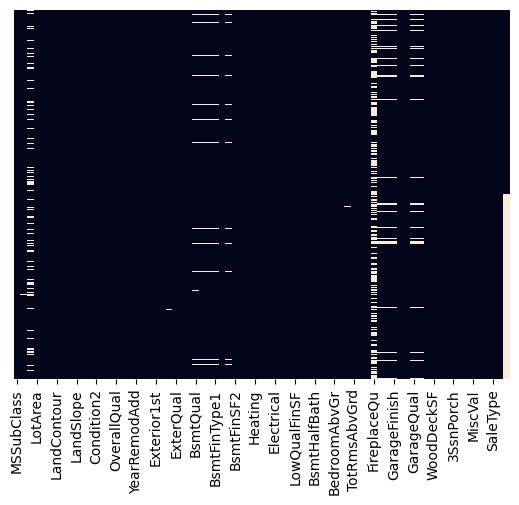

In [14]:


import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)



In [15]:
for cat_col in cat_features:
    train[cat_col]=train[cat_col].fillna(train[cat_col].mode()[0])
    print(cat_col,train[cat_col].isnull().sum())
for num_col in num_features:
    train[num_col] = train[num_col].fillna(train[num_col].mean())       
    print(num_col,train[num_col].isnull().sum())

MSZoning 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinType2 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
KitchenQual 0
Functional 0
FireplaceQu 0
GarageType 0
GarageFinish 0
GarageQual 0
GarageCond 0
PavedDrive 0
SaleType 0
LotFrontage 0
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0


<Axes: >

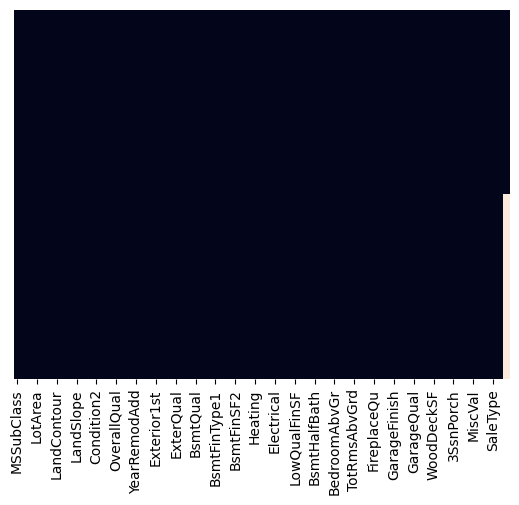

In [16]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [17]:
X = train.drop('SalePrice', axis = 1)
#Y = train['SalePrice']

In [37]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour   
0             60       RL         65.0     8450   Pave      Reg         Lvl  \
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1455         160       RM         21.0     1894   Pave      Reg         Lvl   
1456          20       RL        160.0    20000   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   
1458          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch   
0       AllPub    Inside       Gtl  ...          61             0         0  \
1       AllPub       FR2       Gtl  ...           0             0         0   
2       AllPub    Inside       Gtl  ...          42             0         0   
3       AllPub    Corner       Gtl  ...          35           272         0   
4       AllPub       FR2       Gtl  ...          84             0         0   
...        ...       ...       ...  ...         ...           ...       ...   
1454    AllPub    Inside       Gtl  ...           0             0         0   
1455    AllPub    Inside       Gtl  ...          24             0         0   
1456    AllPub    Inside       Gtl  ...           0             0         0   
1457    AllPub    Inside       Gtl  ...          32             0         0   
1458    AllPub    Inside       Mod  ...          48             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0              0        0        0       2    2008        WD        Normal  
1              0        0        0       5    2007        WD        Normal  
2              0        0        0       9    2008        WD        Normal  
3              0        0        0       2    2006        WD       Abnorml  
4              0        0        0      12    2008        WD        Normal  
...          ...      ...      ...     ...     ...       ...           ...  
1454           0        0        0       6    2006        WD        Normal  
1455           0        0        0       4    2006        WD       Abnorml  
1456           0        0        0       9    2006        WD       Abnorml  
1457           0        0      700       7    2006        WD        Normal  
1458           0        0        0      11    2006        WD        Normal  

[2919 rows x 74 columns]

In [18]:
x_train = pd.get_dummies(X, drop_first = True).astype(int)

In [19]:
x_train.shape

(2919, 233)

In [45]:
#x_train=x_train.drop_duplicates()

In [20]:
len(x_train)

2919

In [75]:
x_train.shape

(2919, 233)

In [55]:
x_train.isnull().any()

MSSubClass               False
LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 233, dtype: bool

In [21]:
m_train=x_train.iloc[:1460,:]
m_test=x_train.iloc[1460:,:]

In [98]:
m_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0             60           65     8450            7            5       2003  \
1             20           80     9600            6            8       1976   
2             60           68    11250            7            5       2001   
3             70           60     9550            7            5       1915   
4             60           84    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60           62     7917            6            5       1999   
1456          20           85    13175            6            6       1978   
1457          70           66     9042            7            9       1941   
1458          20           68     9717            5            6       1950   
1459          20           75     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI   
0             2003         196         706           0  ...               0  \
1             1976           0         978           0  ...               0   
2             2002         162         486           0  ...               0   
3             1970           0         216           0  ...               0   
4             2000         350         655           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455          2000           0           0           0  ...               0   
1456          1988         119         790         163  ...               0   
1457          2006           0         275           0  ...               0   
1458          1996           0          49        1029  ...               0   
1459          1965           0         830         290  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD   
0                  0             0             0            1  \
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family   
0                         0                     0                     0  \
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456      

In [64]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y , test_y = train_test_split(m_train, Y, test_size =0.2, random_state = 42)
train_x.shape , test_x.shape , train_y.shape , test_y.shape

((1168, 233), (292, 233), (1168,), (292,))

In [47]:

from sklearn.metrics import mean_squared_error

y_tesst=submission['SalePrice'].astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)
m_test = scaler.fit_transform(m_test)
train_x = pd.DataFrame(train_x, columns = m_train.columns)
test_x = pd.DataFrame(test_x, columns = m_train.columns)
m_test = pd.DataFrame(m_test, columns = m_test.columns)

y_tesst

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)

ypred1 = dtr.predict(test_x)

ypred1


lg_pred =dtr.score(test_x,test_y)
lg_pred2 = dtr.score(m_test,y_tesst)

print("Implementing upon test data")
print(lg_pred)



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

ypred2 = rf.predict(m_test)

#mse2 = mean_squared_error(ypred2, test_y)

#rmse2 = np.sqrt(mse2)

#rmse2

lg_pred =rf.score(test_x,test_y)
lg_pred2 = rf.score(m_test,y_tesst)

print("Implementing upon test data")
print(lg_pred)

print("Implementing upon submission data")
print(lg_pred2)

from sklearn.metrics import accuracy_score
#m=accuracy_score(ypred2,y_tesst)
#m
ypred2



from sklearn.metrics import classification_report

#report = classification_report(y_tesst, ypred2, digits=2, output_dict=True)
accuracy_percent = report['accuracy'] * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

Implementing upon test data
0.7299614411842634
Implementing upon submission data
-14.484424520010387


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(train_x, train_y)

ypred3 = xgb.predict(test_x)

mse3 = mean_squared_error(ypred3, test_y)

rmse3 = np.sqrt(mse3)

rmse3

lg_pred =xgb.score(test_x,test_y)

print("Implementing upon test data")
print(lg_pred) 

Implementing upon test data
0.6093574677694911


In [35]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(train_x, train_y)

ypred4 = svr.predict(test_x)

lg_pred =svr.score(test_x,test_y)

print("Implementing upon test data")
print(lg_pred)

Implementing upon test data
-0.024160946952125117
